In [1]:
import matplotlib 
from smartbeta.backtest.group_factor_backtest import GroupFactorBackTest
import time
import pandas as pd
import datetime
import time
from smartbeta.analyst import ReturnAnalyzer

from data_provider.datafeed.universe import Universe
from data_provider.nestlib.trading_cal import TradeCal
from data_provider.datafeed.quote_feed import QuoteFeed
from data_provider.nestlib.market_info import Frequency
from smartbeta.factorbase import BaseFactor
from smartbeta.smartfactor import SmartFactor
from data_provider.nestlib.progress_bar import ProgressBar
import numpy as np
import pdb
from smartbeta.backtest.factor_backtest import FactorBackTest
import matplotlib.pyplot as plt
from smartbeta.construction.filters import *
from multiprocessing import Pool
from functools import partial
import multiprocessing
from data_provider.datafeed.universe import Universe
from backtest_batch_service_bartest import backtest_batch_service

In [2]:
def backtest_factors(factor):
    backtest_batch_service.run_backtest_batch(backtest_name,factor,start_date,end_date)
    shared_list.append(backtest_batch_service.result_analysis(backtest_name,factor))

In [ ]:
if __name__=='__main__':
    names=Universe().get_user_factor_names()
    riskf_li = []
    for x in names:
        if x[:26] == 'riskf_neutralized_alpha191':
            riskf_li.append(x)
    riskf_li.append('new_filted_prd_factor_benchmark')
    factor_li = riskf_li
#     factor_li = ['effective_public_factor_filter_0.98_shared_s25_bias_benchmark','shared_s25_bias_benchmark']
    start_date = '20200518'
    end_date = '20210204'
    backtest_name = 'new_benchmark_100stocks_backtest_neutralized_alpha191_factor_filter_0.98'
#     backtest_name = 'effect_flt_benchmark'
    manager = multiprocessing.Manager()
    shared_list = manager.list()
    
    with Pool(15) as p:
        p.map(backtest_factors,factor_li)
        
        
    li = []
    for ele in shared_list:
        li.append(ele)
    unsorted_df = pd.DataFrame(li,columns=['factor_name','sharpe_ratio','cum_ret'])
    sorted_by='cum_ret'
    sorted_df = unsorted_df.sort_values(by=sorted_by,ascending=False)
    sorted_df.to_csv('filter_factor_result_df/'+backtest_name+'.csv')
    
#     sorted_factor_li = sorted_df.factor_name
    
    # plot_one = True:将所有alpha曲线画在同一个图中
    # sorted_by = 'sharpe_ratio' or 'cum_ret'
#     backtest_batch_service.batch_analysis(backtest_name,sorted_factor_li,plot_one=False)


In [12]:
sorted_df.head()

,factor_name,sharpe_ratio,cum_ret
271,riskf_neutralized_alpha191_0.98_new_filted_prd...,0.324166,0.320125
322,riskf_neutralized_alpha191_0.98_new_filted_prd...,0.321510,0.312196
230,riskf_neutralized_alpha191_0.98_new_filted_prd...,0.314217,0.311367
122,riskf_neutralized_alpha191_0.98_new_filted_prd...,0.314295,0.311275
256,riskf_neutralized_alpha191_0.98_new_filted_prd...,0.324318,0.310129


In [13]:
df = sorted_df
sharpe_ratio_benchmark = df.loc[df[df['factor_name']=='new_filted_prd_factor_benchmark'].index[0],'sharpe_ratio']
effective_factor_df = df.loc[:df[df['factor_name']=='new_filted_prd_factor_benchmark'].index[0],:]
effective_factor_df = effective_factor_df.drop(effective_factor_df[effective_factor_df['sharpe_ratio']<sharpe_ratio_benchmark].index)
effective_factor_li = effective_factor_df.factor_name.tolist()

In [55]:
effective_factor_li = [
'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_164_high',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_188_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_113_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_056_high',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_111_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_047_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_120_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_176_high',
'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_082_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_129_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_130_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_075_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_108_low',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_182_high',
# 'riskf_neutralized_alpha191_0.98_new_filted_prd_factor_benchmark_neutralized_shared_alpha191_risk_184_high',
'new_filted_prd_factor_benchmark'
]

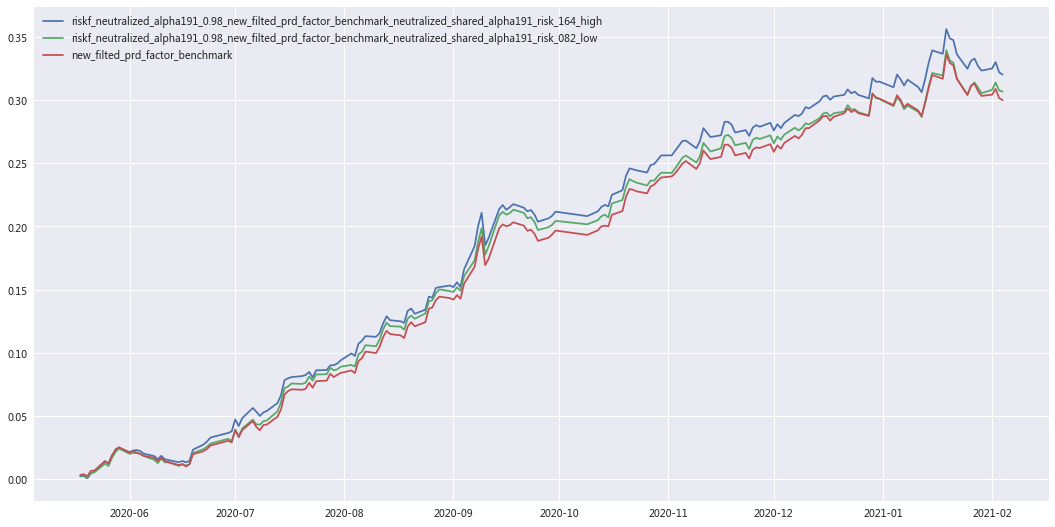

In [56]:
backtest_batch_service.batch_analysis(backtest_name,effective_factor_li,plot_one=True)